In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/MSFT Data.csv')

In [ ]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Ticker
0,02-01-2014,31.058575,37.160000,37.400002,37.099998,37.349998,30632200,MSFT
1,03-01-2014,30.849609,36.910000,37.220001,36.599998,37.200001,31134800,MSFT
2,06-01-2014,30.197680,36.130001,36.889999,36.110001,36.849998,43603700,MSFT
3,07-01-2014,30.431713,36.410000,36.490002,36.209999,36.330002,35802800,MSFT
4,08-01-2014,29.888443,35.759998,36.139999,35.580002,36.000000,59971700,MSFT


In [ ]:
df.tail()

,Date,Adj Close,Close,High,Low,Open,Volume,Ticker
2742,22-11-2024,417.000000,417.000000,417.399994,411.059998,411.369995,24814600,MSFT
2743,25-11-2024,418.790008,418.790008,421.079987,414.850006,418.380005,27691100,MSFT
2744,26-11-2024,427.989990,427.989990,429.040008,418.850006,419.589996,23458900,MSFT
2745,27-11-2024,422.989990,422.989990,427.230011,422.019989,425.109985,18332400,MSFT
2746,29-11-2024,423.459992,423.459992,424.880005,417.799988,420.089996,16271900,MSFT


In [ ]:
df.isnull()

,Date,Adj Close,Close,High,Low,Open,Volume,Ticker
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2742,False,False,False,False,False,False,False,False
2743,False,False,False,False,False,False,False,False
2744,False,False,False,False,False,False,False,False
2745,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
Ticker,0


In [ ]:
## Select the date and price
df = df[['Date','Close']]
## Rename the features:
df = df.rename(columns={'Date':'ds','Close':'y'})
## Show the data
df

,ds,y
0,02-01-2014,37.160000
1,03-01-2014,36.910000
2,06-01-2014,36.130001
3,07-01-2014,36.410000
4,08-01-2014,35.759998
...,...,...
2742,22-11-2024,417.000000
2743,25-11-2024,418.790008
2744,26-11-2024,427.989990
2745,27-11-2024,422.989990


In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet


In [ ]:
!pip install pystan
!pip install prophet


In [ ]:
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
Using cached ephem-4.1.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: 

In [ ]:
!pip uninstall fbprophet -y


In [ ]:
!pip show fbprophet


In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet


In [ ]:
df.head()

,ds,y
0,2014-01-02,37.160000
1,2014-01-03,36.910000
2,2014-01-06,36.130001
3,2014-01-07,36.410000
4,2014-01-08,35.759998


In [ ]:
# Convert 'ds' column to datetime using the correct format
df['ds'] = pd.to_datetime(df['ds'], format='%d-%m-%Y')

In [ ]:
## Train the model --- Daily
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5c14erw5/p5h1xwkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5c14erw5/skwg4bt0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79839', 'data', 'file=/tmp/tmp5c14erw5/p5h1xwkh.json', 'init=/tmp/tmp5c14erw5/skwg4bt0.json', 'output', 'file=/tmp/tmp5c14erw5/prophet_modelhouuqtft/prophet_model-20241226094945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:49:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
## Forecast Away -- Daily
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-02,37.255414,12.732378,59.192373,37.255414,37.255414,-1.518540,-1.518540,-1.518540,1.300948,...,0.033870,0.033870,0.033870,-2.853358,-2.853358,-2.853358,0.0,0.0,0.0,35.736875
1,2014-01-03,37.271726,12.636783,59.963668,37.271726,37.271726,-1.644644,-1.644644,-1.644644,1.300948,...,0.167607,0.167607,0.167607,-3.113198,-3.113198,-3.113198,0.0,0.0,0.0,35.627083
2,2014-01-06,37.320662,10.324948,56.517098,37.320662,37.320662,-2.457341,-2.457341,-2.457341,1.300948,...,0.045937,0.045937,0.045937,-3.804226,-3.804226,-3.804226,0.0,0.0,0.0,34.863321
3,2014-01-07,37.336974,13.508592,57.571677,37.336974,37.336974,-2.707355,-2.707355,-2.707355,1.300948,...,-0.013662,-0.013662,-0.013662,-3.994641,-3.994641,-3.994641,0.0,0.0,0.0,34.629619
4,2014-01-08,37.353286,12.405429,56.619423,37.353286,37.353286,-2.767695,-2.767695,-2.767695,1.300948,...,0.091485,0.091485,0.091485,-4.160129,-4.160129,-4.160129,0.0,0.0,0.0,34.585591


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2842,2025-03-05,487.297193,460.919904,505.756457,477.744720,494.223618,-3.173150,-3.173150,-3.173150,1.300948,...,0.091485,0.091485,0.091485,-4.565584,-4.565584,-4.565584,0.0,0.0,0.0,484.124043
2843,2025-03-06,487.578301,458.990854,506.192791,477.876611,494.581079,-3.331333,-3.331333,-3.331333,1.300948,...,0.033870,0.033870,0.033870,-4.666151,-4.666151,-4.666151,0.0,0.0,0.0,484.246968
2844,2025-03-07,487.859409,459.743720,507.839525,478.019922,494.946286,-3.253103,-3.253103,-3.253103,1.300948,...,0.167607,0.167607,0.167607,-4.721658,-4.721658,-4.721658,0.0,0.0,0.0,484.606306
2845,2025-03-08,488.140517,459.825589,508.435834,478.175282,495.373129,-3.593919,-3.593919,-3.593919,1.300948,...,-0.162618,-0.162618,-0.162618,-4.732249,-4.732249,-4.732249,0.0,0.0,0.0,484.546598
2846,2025-03-09,488.421624,460.971675,508.352928,478.331001,495.743192,-3.560427,-3.560427,-3.560427,1.300948,...,-0.162618,-0.162618,-0.162618,-4.698757,-4.698757,-4.698757,0.0,0.0,0.0,484.861198


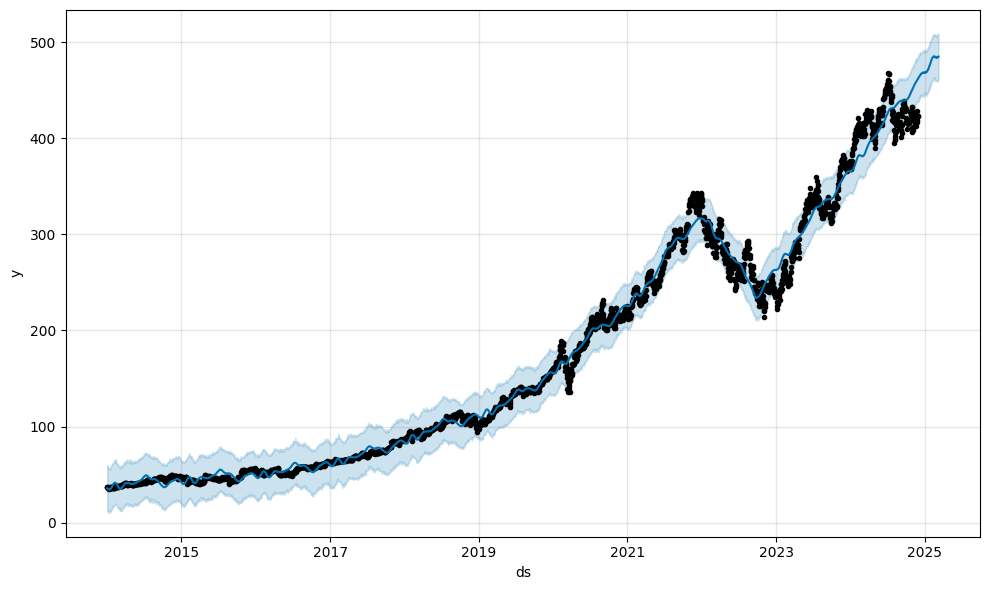

In [ ]:
plot1= m.plot(forecast)

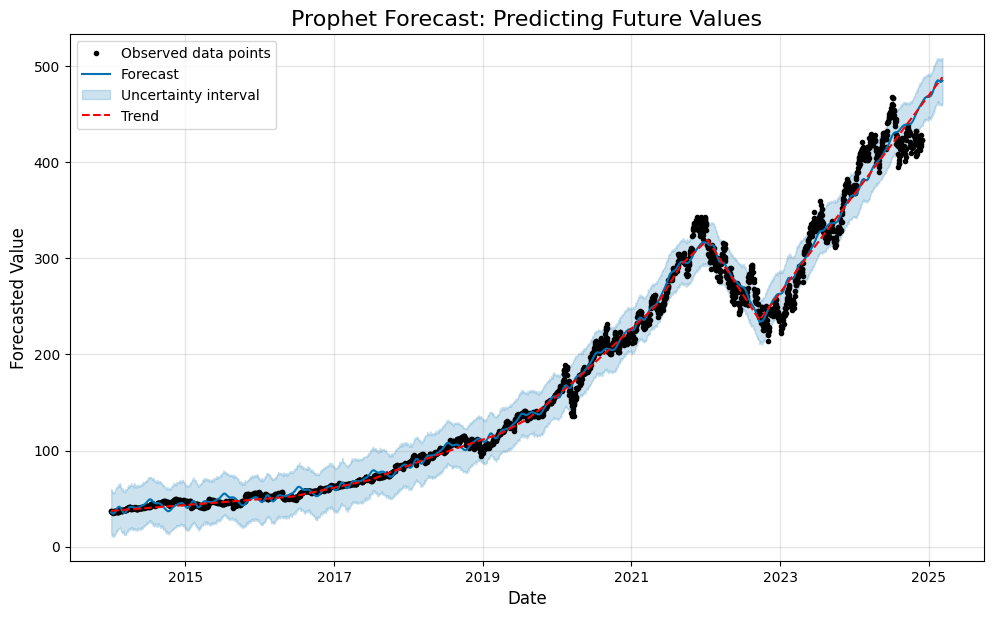

In [ ]:
import matplotlib.pyplot as plt

# Generate the plot
plot1 = m.plot(forecast)

# Set plot title
plt.title("Prophet Forecast: Predicting Future Values", fontsize=16)

# Set x and y axis labels
plt.xlabel('Date', fontsize=12)
plt.ylabel('Forecasted Value', fontsize=12)

# Add grid for better readability
plt.grid(True)

# Customizing the legend
plt.legend(['Observed', 'Forecasted', 'Uncertainty Interval'], loc='upper left')

# Optional: Highlight trend and seasonal components
plt.plot(forecast['ds'], forecast['trend'], color='red', label='Trend', linestyle='--')
plt.legend()

# Show the plot
plt.show()


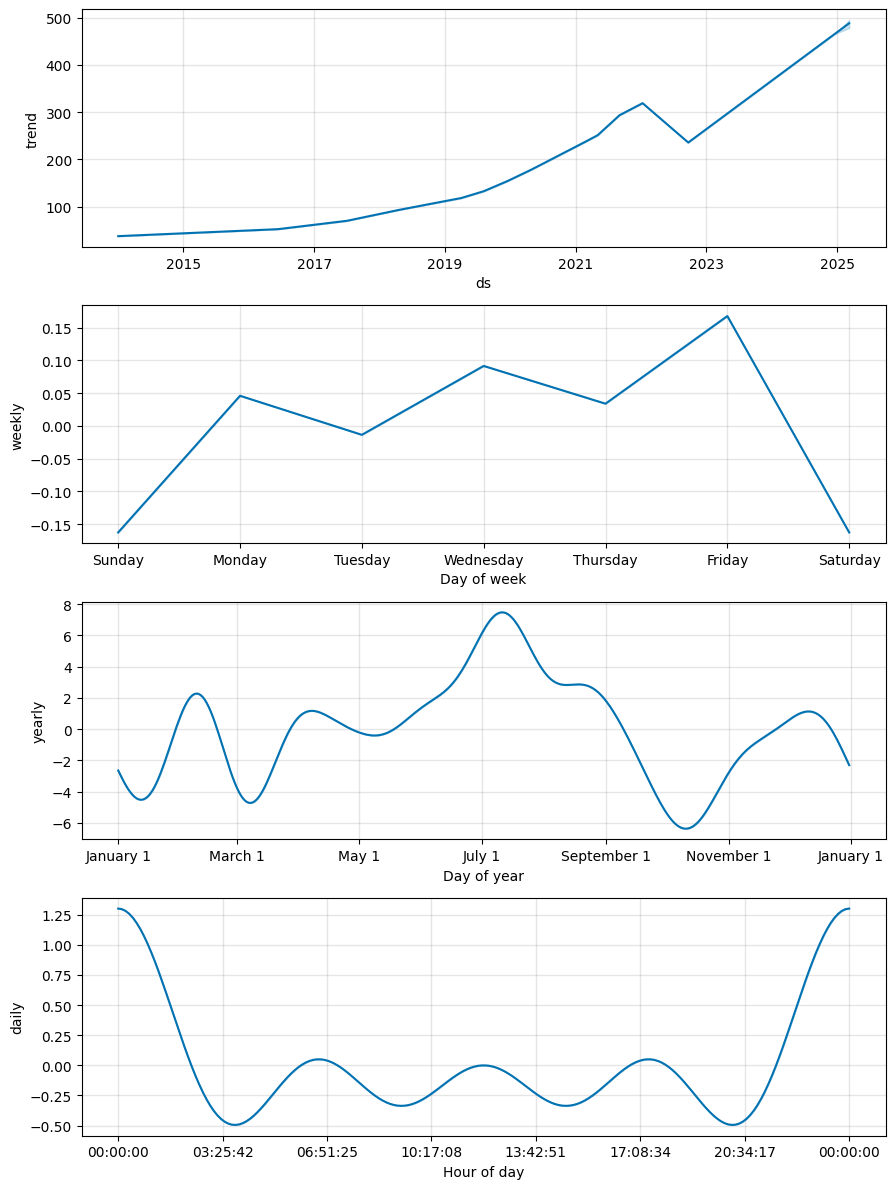

In [ ]:
# Plot the components (trend, weekly seasonality, yearly seasonality, etc.)
fig2 = m.plot_components(forecast)

# Show the component plots
plt.show()


Cross-Validation for Time Series (Optional)
While splitting into training and test sets is a good start, time series models should also consider the sequential nature of the data. Prophet offers a built-in cross-validation method that helps evaluate the model's performance over multiple rolling test sets. This can provide a better understanding of how the model generalizes.

In [ ]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# Cross-validation (testing the model's performance over multiple time periods)
cv = cross_validation(m, initial='80 days', period='30 days', horizon='30 days')

# Calculate performance metrics from cross-validation
performance = performance_metrics(cv)
print(performance)


INFO:prophet:Making 130 forecasts with cutoffs between 2014-03-27 00:00:00 and 2024-10-30 00:00:00


  0%|          | 0/130 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5c14erw5/f2rf88cf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5c14erw5/p_d_ue5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30562', 'data', 'file=/tmp/tmp5c14erw5/f2rf88cf.json', 'init=/tmp/tmp5c14erw5/p_d_ue5x.json', 'output', 'file=/tmp/tmp5c14erw5/prophet_modelrcwlzru9/prophet_model-20241226095426.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:54:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:54:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5c14erw5/8m3tbnxc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5c14erw5/6xzg0wkp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

   horizon          mse       rmse        mae      mape     mdape     smape  \
0   3 days   643.513553  25.367569  14.616355  0.060630  0.033957  0.060336   
1   4 days   664.361034  25.775202  15.006163  0.063872  0.040162  0.063818   
2   5 days   691.274954  26.292108  15.398168  0.067006  0.041214  0.067530   
3   6 days   742.735640  27.253177  16.100565  0.071253  0.042887  0.072728   
4   7 days   725.732531  26.939423  15.954804  0.072735  0.040279  0.075732   
5   8 days   756.010661  27.495648  16.508848  0.078159  0.045306  0.083695   
6   9 days   776.143607  27.859354  16.934963  0.081586  0.047700  0.085925   
7  10 days   834.358283  28.885261  17.685089  0.085624  0.051557  0.088205   
8  11 days   817.607157  28.593831  17.611109  0.092747  0.053715  0.092201   
9  12 days   840.385480  28.989403  17.844479  0.101510  0.057575  0.100759   
10 13 days   868.013461  29.462068  18.266497  0.110744  0.061663  0.107882   
11 14 days   899.222639  29.987041  18.301180  0.116

Interpretation of the Results
Forecast Horizon: As the horizon increases (i.e., the number of days forecasted increases), the error metrics generally get worse, which is typical in time series forecasting because the further out you predict, the less certain the model's forecasts are.

MSE, RMSE, MAE: These errors increase as the forecast horizon increases, suggesting that the model's predictions become less accurate as you move further away from the training period.

MAPE and MDAPE: Both are relative error metrics, and they also tend to increase as the forecast horizon increases. This is expected, as larger prediction horizons typically lead to larger relative errors.

SMAPE: Similar to MAPE, but it tends to be more balanced in handling positive and negative errors, and it generally shows the same increasing trend as the forecast horizon increases.

Example of Trend in the data:
At the 3-day horizon:
MSE = 643.51, RMSE = 25.37, MAE = 14.62, MAPE = 6.06%, SMAPE = 6.03%
At the 30-day horizon:
MSE = 6124.73, RMSE = 78.26, MAE = 28.80, MAPE = 33.90%, SMAPE = 14.02%
As you can see, the errors grow significantly as the forecast horizon extends. For instance, MAPE increases from 6.06% (3 days) to 33.90% (30 days). This means the model's performance is likely much more reliable in the short term and becomes progressively less reliable as the forecast horizon increases.

Conclusion
These performance metrics help to understand how well the Prophet model is forecasting at different horizons. Typically, a model performs better over shorter horizons and less accurately over longer horizons. we can use these metrics to tune the model (e.g., by adjusting hyperparameters or adding seasonality) and improve its forecasting accuracy.



